## 收集

In [1]:
#导入相关包
import numpy as np
import pandas as pd
import tweepy 
import json
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Bruce\Anaconda\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
#导入数据集并查看
df = pd.read_csv('twitter-archive-enhanced.csv')

## 评估

In [3]:
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1133,728751179681943552,NaN,NaN,2016-05-07 00:59:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flurpson. He can't believe it's not bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728751179...,10,10,Flurpson,None,None,None,None
925,755110668769038337,NaN,NaN,2016-07-18 18:43:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Watson. He trust falls on command. 13/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/755110668...,13,10,Watson,None,None,None,None
1399,699691744225525762,NaN,NaN,2016-02-16 20:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dave. He's a tropical pup. Short lil l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699691744...,5,10,Dave,None,None,None,None
2195,668872652652679168,NaN,NaN,2015-11-23 19:24:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Amélie. She is a confident white colle...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668872652...,11,10,Amélie,None,None,None,None
1716,680206703334408192,NaN,NaN,2015-12-25 02:01:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I hope everyone enjoys this picture as much as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680206703...,12,10,Toby,None,None,None,None


In [4]:
#使用Requests下载image predictions文件
import requests
import os
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)

folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [5]:
df_image = pd.read_csv('image-predictions.tsv', sep = '\t')

In [6]:
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
750,687826841265172480,https://pbs.twimg.com/media/CYum3KbWEAArFrI.jpg,1,Pomeranian,0.997210,True,Pekinese,0.000803,True,keeshond,0.000373,True
1744,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True
1576,796080075804475393,https://pbs.twimg.com/media/Cww-msrXcAAxm3K.jpg,1,chow,0.973846,True,Tibetan_mastiff,0.014110,True,gibbon,0.002358,False
2042,885528943205470208,https://pbs.twimg.com/media/DEoH3yvXgAAzQtS.jpg,1,pug,0.369275,True,Labrador_retriever,0.265835,True,kuvasz,0.134697,True
1276,750071704093859840,https://pbs.twimg.com/media/CmjKOzVWcAAQN6w.jpg,2,redbone,0.382113,True,malinois,0.249943,True,miniature_pinscher,0.070926,True


In [7]:
#观察数据集结构
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [11]:
#构建tweet_json的数据集，并查看
df_tweet = pd.read_json('tweet_json.txt', lines = 'True')
df_tweet.sample(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
675,NaN,NaN,2016-10-21 00:53:56,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 789268438468423680, 'id_str'...",10147,False,This is Stella. She's happier than I will ever...,NaN,...,0.0,NaN,NaN,NaN,2996,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
901,NaN,NaN,2016-07-27 00:40:12,"[0, 87]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,21213,False,In case you haven't seen the most dramatic sne...,NaN,...,0.0,NaN,NaN,NaN,11474,False,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1064,NaN,NaN,2016-06-08 02:41:38,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 740373148126859264, 'id_str'...",37704,False,"After so many requests, this is Bretagne. She ...",NaN,...,0.0,NaN,NaN,NaN,15029,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
32,NaN,NaN,2017-07-14 22:10:11,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 885984792034004992, 'id_str'...",33299,False,Viewer discretion advised. This is Jimbo. He w...,NaN,...,0.0,NaN,NaN,NaN,7043,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
384,NaN,NaN,2017-02-01 01:11:25,"[0, 69]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,5617,False,"I was going to do 007/10, but the joke wasn't ...",NaN,...,NaN,NaN,NaN,NaN,292,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [12]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2352 non-null datetime64[ns]
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null float64
id                               2352 non-null int64
id_str                           2352 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [13]:
df.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Daisy          7
Bailey         7
Buddy          7
an             7
Toby           7
Bella          6
Jax            6
Koda           6
Jack           6
Milo           6
Dave           6
Oscar          6
Scout          6
Rusty          6
Stanley        6
Leo            6
Finn           5
            ... 
Diogi          1
Link           1
Monster        1
Fiji           1
Jerome         1
Loomis         1
Sundance       1
Stephanus      1
Striker        1
Brandy         1
Emanuel        1
Sephie         1
Blanket        1
Fabio          1
Dixie          1
Tom            1
Birf           1
Timmy          1
Strider        1
Richie         1
Shelby         1
Pavlov         1
Ben            1
Cheesy         1
Flurpson       1
Tug            1
Laela          1
Maks          

In [14]:
#统计评分中 分子小于10 的数据
df[df['rating_numerator'] < 10].count()

tweet_id                      440
in_reply_to_status_id          12
in_reply_to_user_id            12
timestamp                     440
source                        440
text                          440
retweeted_status_id             9
retweeted_status_user_id        9
retweeted_status_timestamp      9
expanded_urls                 430
rating_numerator              440
rating_denominator            440
name                          440
doggo                         440
floofer                       440
pupper                        440
puppo                         440
dtype: int64

In [15]:
#统计评分中分母不等于10的数据
df[df['rating_denominator'] != 10].count()

tweet_id                      23
in_reply_to_status_id          5
in_reply_to_user_id            5
timestamp                     23
source                        23
text                          23
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                 19
rating_numerator              23
rating_denominator            23
name                          23
doggo                         23
floofer                       23
pupper                        23
puppo                         23
dtype: int64

#### 质量
- 存在转发的Twitter，这些并非原始记录，可以进行删除，另外根据项目要求不包含图片的原始数据也需要删除
- 时间戳需要更改为统一的日期类型
- tweet_id应该是字符串类型，而不是数字类型
- 有些列队分析狗狗用处并不大，可以丢弃，例如'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id'（此列数据对于清除转发数据有用，之后可以丢弃）,'retweeted_status_user_id', 'retweeted_status_timestamp’等等
- 将p1,p2,p3列的数据调整为首字母大写，其他字母均小写的格式
- 评分中存在分子小于10或分母不等于10的数据
- 有些狗狗的名字存在错误（比如‘a’,'an'等等,这些并不是名字）
- 可以完整的显示文档，以便更好的观察数据


#### 清洁度
- 可以把三个数据集合并在一起
- 'doggo','floofer','pupper','puppo'这些列都是对狗狗的描述与评价，可以整理到一列中

## 清理

In [16]:
#备份数据文件
df_clean = df.copy()
df_image_clean = df_image.copy()
df_tweet_clean = df_tweet.copy()

## 清洁度

**清洁度问题1：合并数据集**

**解题思路：构造相同的id，使用merge函数将数据集合并**

In [17]:
#将json文件中的‘id’列名更改为‘tweet_id’
df_tweet_clean.rename(index = str, columns = {'id':'tweet_id'}, inplace = True)
#通过tweet_id列将三个数据集合并在一起
df_clean = pd.merge(df_clean, df_image_clean, on = ['tweet_id'], how = 'inner')
df_clean = pd.merge(df_clean, df_tweet_clean, on = ['tweet_id'])

In [18]:
#查看合并后的数据集
df_clean.head()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source_y,truncated,user
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.0,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.0,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.0,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.0,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.0,NaN,NaN,NaN,9721,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


**测试**

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 58 columns):
tweet_id                         2073 non-null int64
in_reply_to_status_id_x          23 non-null float64
in_reply_to_user_id_x            23 non-null float64
timestamp                        2073 non-null object
source_x                         2073 non-null object
text                             2073 non-null object
retweeted_status_id              79 non-null float64
retweeted_status_user_id         79 non-null float64
retweeted_status_timestamp       79 non-null object
expanded_urls                    2073 non-null object
rating_numerator                 2073 non-null int64
rating_denominator               2073 non-null int64
name                             2073 non-null object
doggo                            2073 non-null object
floofer                          2073 non-null object
pupper                           2073 non-null object
puppo                            2073 

**清洁度问题2：将'doggo','floofer','pupper','puppo'这些对狗狗的描述与评价整理到一列中**

**解题思路：先构造一个描述狗狗的列'dog_status',然后使用str.findall()函数筛选有用的信息到该列中，然后删除这四个列**

In [20]:
#将文本转换为小写格式，并提取所有符合的内容，同时使用set()函数去重
df_clean['dog_status'] = df_clean['text'].str.lower().str.findall('(doggo|floofer|pupper|puppo)').apply(lambda x: '|'.join(set(x)))

In [21]:
#将狗的地位中为None的值替换为np.NaN，这样我们在后续分析的时候可以避免筛选
df_clean.loc[df_clean.dog_status == '', 'dog_status'] = np.NaN

**测试**

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 59 columns):
tweet_id                         2073 non-null int64
in_reply_to_status_id_x          23 non-null float64
in_reply_to_user_id_x            23 non-null float64
timestamp                        2073 non-null object
source_x                         2073 non-null object
text                             2073 non-null object
retweeted_status_id              79 non-null float64
retweeted_status_user_id         79 non-null float64
retweeted_status_timestamp       79 non-null object
expanded_urls                    2073 non-null object
rating_numerator                 2073 non-null int64
rating_denominator               2073 non-null int64
name                             2073 non-null object
doggo                            2073 non-null object
floofer                          2073 non-null object
pupper                           2073 non-null object
puppo                            2073 

In [23]:
df_clean['dog_status'].value_counts()

pupper           236
doggo             72
puppo             28
floofer            7
doggo|pupper       7
pupper|doggo       4
doggo|puppo        2
doggo|floofer      1
Name: dog_status, dtype: int64

## 质量

**质量问题1：清理转发的推特数据**

**解题思路：通过指定'retweeted_status_id'null值的判断为假，即有数据的部分都是转发twitter,而不是original数据，对这些数据进行删除**

In [24]:
df_clean[df_clean['retweeted_status_id'].isnull() == False]

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source_y,truncated,user,dog_status
32,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,...,NaN,NaN,NaN,19188,False,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN
67,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,...,NaN,NaN,NaN,82,False,{'created_at': 'Mon Jun 19 17:14:49 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",pupper
81,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,...,NaN,NaN,NaN,12435,False,{'created_at': 'Sun May 28 17:23:24 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN
109,867072653475098625,NaN,NaN,2017-05-23 17:40:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachaeleasler: these @dog_rates hats are 1...,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,https://twitter.com/rachaeleasler/status/86501...,...,NaN,NaN,NaN,134,False,{'created_at': 'Thu May 18 01:17:25 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN
132,860924035999428608,NaN,NaN,2017-05-06 18:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @tallylott: h*ckin adorable promposal. 13/1...,8.609145e+17,3.638908e+08,2017-05-06 17:49:42 +0000,https://twitter.com/tallylott/status/860914485...,...,NaN,NaN,NaN,879,False,{'created_at': 'Sat May 06 17:49:42 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN
169,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,...,NaN,NaN,NaN,10647,False,{'created_at': 'Wed Feb 08 17:00:26 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",doggo
170,851861385021730816,NaN,NaN,2017-04-11 18:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @eddie_coe98: Thanks @dog_rates completed m...,8.482894e+17,3.410211e+08,2017-04-01 21:42:03 +0000,https://twitter.com/eddie_coe98/status/8482893...,...,NaN,NaN,NaN,23,False,{'created_at': 'Sat Apr 01 21:42:03 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN
185,847971574464610304,NaN,NaN,2017-04-01 00:39:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @basic_vacek_: I love my new mug easy 13/10...,8.479710e+17,5.970642e+08,2017-04-01 00:36:55 +0000,https://twitter.com/basic_vacek_/status/847971...,...,NaN,NaN,NaN,479,False,{'created_at': 'Sat Apr 01 00:36:55 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN
208,842892208864923648,NaN,NaN,2017-03-18 00:15:37 +0000

In [25]:
df_clean.drop(df_clean[df_clean['retweeted_status_id'].isnull() == False].index, inplace = True)

**测试**

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 59 columns):
tweet_id                         1994 non-null int64
in_reply_to_status_id_x          23 non-null float64
in_reply_to_user_id_x            23 non-null float64
timestamp                        1994 non-null object
source_x                         1994 non-null object
text                             1994 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
expanded_urls                    1994 non-null object
rating_numerator                 1994 non-null int64
rating_denominator               1994 non-null int64
name                             1994 non-null object
doggo                            1994 non-null object
floofer                          1994 non-null object
pupper                           1994 non-null object
puppo                            1994 non

**质量问题2：将时间戳由字符串类型转换为日期类型**

**解题思路：使用datetime包，将原本不规整的日期数据转换为统一的格式：xx年xx月xx日 xx时xx分。**

In [27]:
#导入日期处理相关包
from datetime import datetime
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

In [28]:
df_clean['date'] = df_clean['timestamp'].apply(lambda time:time.strftime('%Y-%m-%d'))
df_clean['time'] = df_clean['timestamp'].apply(lambda time:time.strftime('%H:%M'))                                            

**测试**

In [29]:
df_clean.head()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source_y,truncated,user,dog_status,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,2017-08-01,16:23
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,2017-08-01,00:17
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,2017-07-31,00:18
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,2017-07-30,15:58
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,NaN,9721,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,2017-07-29,16:00


**质量问题3：将tweet_id由数字类型转换为字符串类型**

**解题思路：可直接使用astype函数**

In [30]:
df_tweet_clean.tweet_id = df_tweet_clean.tweet_id.astype(str)

**测试**

In [31]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2352 non-null datetime64[ns]
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null float64
tweet_id                         2352 non-null object
id_str                           2352 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-n

**质量问题4：将用处不大的数据列清除**

**解题思路：对于分析狗狗，tweet-archive-enhanced中的非原生数据用处并不大，像转发的Twitter等。观察df数据集，以下列可以直接丢弃：'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'**

In [32]:
labels = ['in_reply_to_status_id_x', 'in_reply_to_user_id_x', 'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp']
df_clean.drop(labels, axis = 1, inplace = True)

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 56 columns):
tweet_id                         1994 non-null int64
timestamp                        1994 non-null datetime64[ns]
source_x                         1994 non-null object
text                             1994 non-null object
expanded_urls                    1994 non-null object
rating_numerator                 1994 non-null int64
rating_denominator               1994 non-null int64
name                             1994 non-null object
doggo                            1994 non-null object
floofer                          1994 non-null object
pupper                           1994 non-null object
puppo                            1994 non-null object
jpg_url                          1994 non-null object
img_num                          1994 non-null int64
p1                               1994 non-null object
p1_conf                          1994 non-null float64
p1_dog                  

**质量问题5：将P1，P2，P3三列中的数据调整为首字母大写，其他字母均小写的统一格式**

**解题思路：使用capitalize函数**

In [34]:
df_clean['p1'] = df_clean['p1'].str.capitalize()
df_clean['p2'] = df_clean['p2'].str.capitalize()
df_clean['p3'] = df_clean['p3'].str.capitalize()

**测试**

In [35]:
df_clean.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source_y,truncated,user,dog_status,date,time
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,2017-08-01,16:23
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,2017-08-01,00:17
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,2017-07-31,00:18
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,2017-07-30,15:58
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,NaN,9721,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,2017-07-29,16:00


**质量问题6：整理评分中分子小于10以及分母不等于10的数据分布情况**

**解题思路：使用extract函数及正则表达式**

In [40]:
ratings = df_clean.text.str.extract('((?:\d+\.)?\d+)\/((?:\d+\.)?\d+)', expand=True)
df_clean['rating_numerator'] = ratings[0]
df_clean['rating_denominator'] = ratings[1]

**测试**

In [41]:
df_clean['rating_numerator'].value_counts()

12       450
10       419
11       396
13       261
9        151
8         95
7         52
14        35
5         32
6         32
3         19
4         16
2          9
1          5
0          2
1776       1
165        1
13.5       1
9.75       1
60         1
88         1
144        1
84         1
204        1
99         1
50         1
24         1
11.26      1
45         1
44         1
420        1
11.27      1
121        1
143        1
80         1
Name: rating_numerator, dtype: int64

In [42]:
df_clean['rating_denominator'].value_counts()

10     1976
50        3
11        2
80        2
70        1
40        1
20        1
110       1
170       1
150       1
2         1
120       1
130       1
90        1
7         1
Name: rating_denominator, dtype: int64

**质量问题7：整理狗狗的名字**

**解题思路：由于name列里的内容可能并不仅仅是名字，还会有其他文本内容，这里使用正则表达式及extract函数，从数据框内所有内容中删选出匹配的名字数据**

In [43]:
df_clean['name'] = df_clean['text'].str.extract('(?:This\sis\s|Meet\s)([A-Z][a-zA-Z]*)')

**测试**

In [44]:
df_clean.name.value_counts()

Charlie        10
Tucker          9
Cooper          9
Lucy            9
Oliver          8
Penny           8
Lola            7
Winston         7
Toby            7
Daisy           7
Bo              6
Koda            6
Jax             6
Bella           6
Stanley         6
Sadie           6
Buddy           5
Scout           5
Bailey          5
Chester         5
Louis           5
Oscar           5
Rusty           5
Milo            5
Jerry           4
Derek           4
Bear            4
Chip            4
Dave            4
Brody           4
               ..
Crawford        1
Pipsy           1
Rueben          1
Ralf            1
Chevy           1
O               1
Strider         1
Sierra          1
Scott           1
Timmy           1
Kaia            1
Roscoe          1
Durg            1
Miley           1
Nico            1
Dug             1
Franq           1
Layla           1
Cora            1
Shakespeare     1
Stephanus       1
Brandy          1
Emanuel         1
Sephie          1
Blanket   

**质量问题8：将文档完整的显示出来**

**解题思路：使用set_option函数，max_colwidth属性**

In [45]:
pd.set_option('display.max_colwidth', -1)

In [46]:
df_clean.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,retweeted,retweeted_status,source_y,truncated,user,dog_status,date,time,rating_numerator1,rating_denominator1
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,...,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WILL RATE', 'description': 'Only Legit Source for Professional Dog Ratings STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs | MOBILE APP: @GoodDogsGame Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3768791, 'friends_count': 107, 'listed_count': 3169, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 120162, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5749, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/914581071265755136/2h5uFpwU_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/914581071265755136/2h5uFpwU_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1506888628', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': False, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}",NaN,2017-08-01,16:23,13.0,10
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,...,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WILL RATE', 'description': 'Only Legit Source for Professional Dog Ratings STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs | MOBILE APP: @GoodDogsGame Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3768791, 'friends_count': 107, 'listed_count': 3169, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 120162, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5749, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': '

**数据清洗完成，保存为新数据集'tweet-archive-master'**

In [47]:
df_clean.to_csv('tweet-archive-master.csv', index = False, encoding = 'utf-8')

## 数据可视化分析

**分析问题1：最热门的狗狗名字都叫什么？**

**分析思路：数据集中有单独一列狗狗的名字‘name’，直接统计各个名字的数量，再用柱状图呈现出来即可**

Text(0, 0.5, 'Counts')

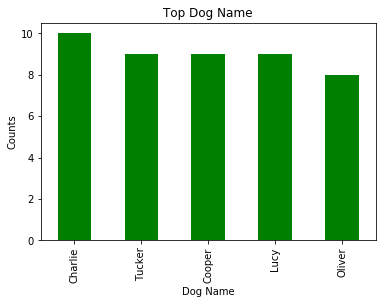

In [48]:
dog_names = df_clean['name'].value_counts()
dog_names.head(5).plot(kind = 'bar', title = 'Top Dog Name', color = 'g')
plt.xlabel('Dog Name')
plt.ylabel('Counts')

**分析结果1：此图表可以看出最受欢迎的狗狗名字，如：Charlie，Lucy，Cooper, Tucker, Penny**

**分析问题2：养的最多的狗狗都是什么品种？（取Top 10）**

**分析思路：跟上一个分析问题一样，此处可以根据p1这一列的值，统计各个品种的数量，再用柱状图呈现即可**

Text(0, 0.5, 'Counts')

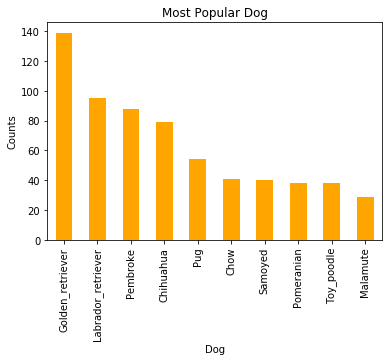

In [49]:
popular_dog = df_clean['p1'].value_counts()
popular_dog.head(10).plot(kind = 'bar', title = 'Most Popular Dog', color = 'orange')
plt.xlabel('Dog')
plt.ylabel('Counts')

**分析结果2：由上述可视化可以看出，‘金毛’以绝对的数量优势成为最受欢迎的品种，而‘拉布拉多’，‘彭布罗克’，‘吉娃娃’也都有这很高的数量，这几种彼此数量差异并不是太大，第六名到第十名的数量差异则更小**

**分析问题3：出现最多的评价描述是什么？**

**分析思路：在dog_class列统计各个评价描述的数量，使用柱状图输出即可**

Text(0, 0.5, 'Counts')

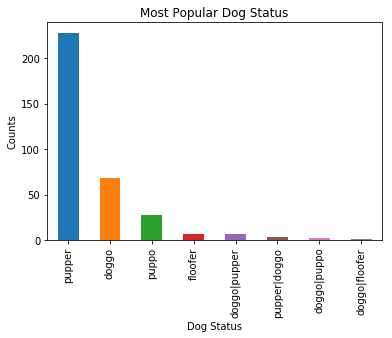

In [50]:
df_status_most = df_clean['dog_status'].value_counts()
df_status_most.plot(kind = 'bar', title = 'Most Popular Dog Status')
plt.xlabel('Dog Status')
plt.ylabel('Counts')

**分析结果3：出现最多的评价描述是'Pupper',其次是Floofer,Doggo,Puppo**